In [ ]:

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil


In [ ]:
!pip install jupyterthemes
!pip install seaborn
!pip install missingno
!pip install vaderSentiment
!pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors
plt.style.use('ggplot')

import seaborn as sns
import missingno as msno

import re
import string
import json
import glob

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download ('wordnet')

import spacy
!python -m spacy download en_core_web_md
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# **Read the Dataset**

In [ ]:
df = pd.read_csv('/content/output.csv')
df.head()

Prompt_improvment  \
0   ultra detailed with artistic abstract, deep f...   
1   detailed 16k resolution, high definition, sur...   
2   deep colorful digital painting layers,8K UHD ...   
3   in the style of volumetric lighting, master p...   
4  ultra-high resolution, iconoclastic, wireframe...   

                                       Random_prompt  \
0  best quality,masterpiece,realistic, detailed, ...   
1  best quality,masterpiece,realistic, detailed, ...   
2  best quality,masterpiece,realistic, detailed, ...   
3  best quality,masterpiece,realistic, detailed, ...   
4  best quality,masterpiece,realistic, detailed, ...   

                         Landscape_improvment_custom  \
0  In a stained glass style, envision a slumberin...   
1  (ultra high res:1.4), (masterpiece), (beautifu...   
2  fantasy illustration by John Howe, James C. Ch...   
3  Generate an enchanting and surreal depiction o...   
4  unreal engine 5 render, jungle, river, flowers...   

                         Landscape_improvment_artist  \
0  A Painting by Cyril Rolando, In a stained glas...   
1  A Painting by Cyril Rolando (ultra high res:1....   
2  A Painting by Cyril Rolando fantasy illustrati...   
3  A Painting by Cyril Rolando Generate an enchan...   
4  A Painting by Cyril Rolando unreal engine 5 re...   

                         Prompt_improvment_by_artist  logo  journal_prompts  \
0  painting by Cyril Rolando, ultra detailed with...   NaN              NaN   
1  painting by Cyril Rolando, detailed 16k resolu...   NaN              NaN   
2  painting by Cyril Rolando, deep colorful digit...   NaN              NaN   
3  painting by Cyril Rolando, in the style of vol...   NaN              NaN   
4  painting by Cyril Rolando, ultra-high resoluti...   NaN              NaN   

   journal_p_improvement  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

In [ ]:
print(df.shape)
df.info()

(510, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Prompt_improvment            10 non-null     object 
 1   Random_prompt                134 non-null    object 
 2   Landscape_improvment_custom  102 non-null    object 
 3   Landscape_improvment_artist  510 non-null    object 
 4   Prompt_improvment_by_artist  55 non-null     object 
 5   logo                         0 non-null      float64
 6   journal_prompts              0 non-null      float64
 7   journal_p_improvement        0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 32.0+ KB


Prompt_improvment              500
Random_prompt                  376
Landscape_improvment_custom    408
Landscape_improvment_artist      0
Prompt_improvment_by_artist    455
logo                           510
journal_prompts                510
journal_p_improvement          510
dtype: int64


<Axes: >

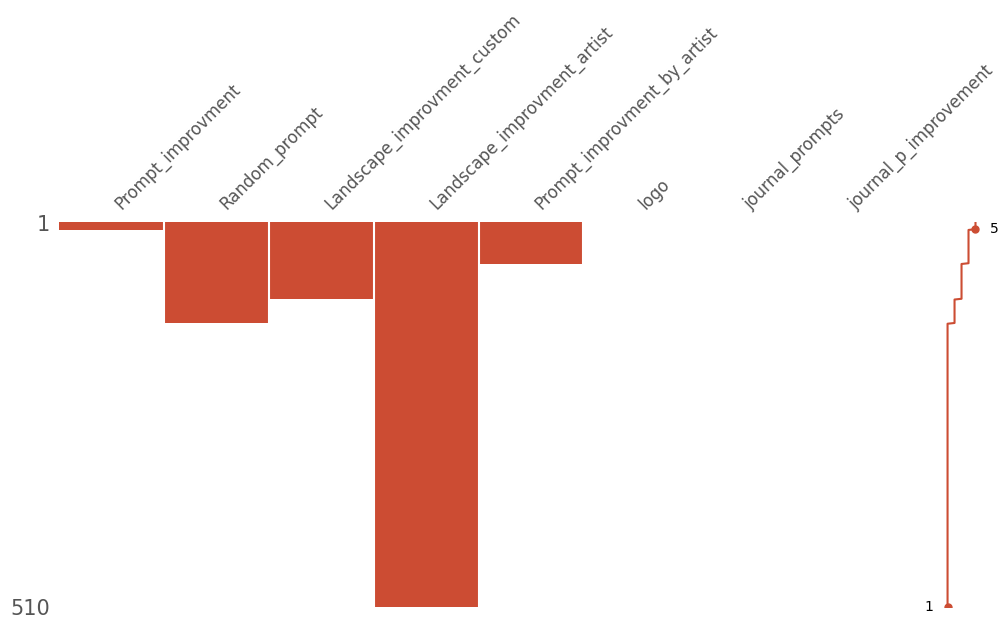

In [ ]:
print(df.isnull().sum())
msno.matrix(df,figsize=(12,5), fontsize=12, color=(0.8, 0.3, 0.2))

In [ ]:
# Dropping Null Values
df.dropna(inplace = True)
df.isna().sum()

Prompt_improvment              0.0
Random_prompt                  0.0
Landscape_improvment_custom    0.0
Landscape_improvment_artist    0.0
Prompt_improvment_by_artist    0.0
logo                           0.0
journal_prompts                0.0
journal_p_improvement          0.0
dtype: float64

In [ ]:
print(df['Landscape_improvment_custom'].value_counts())
print(df['Landscape_improvment_artist'].value_counts())
print(df['Prompt_improvment_by_artist'].value_counts())

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


In [ ]:
import pandas as pd
import re

# Load data from CSV file
df = pd.read_csv('/content/output.csv')

# Check if 'subreddit' column exists in the DataFrame
if 'subreddit' in df.columns:
    # If the column exists, apply the transformations
    df['subreddit'] = df['subreddit'].apply(lambda x: re.sub(r"r/", "", x))
    df['subreddit'] = df['subreddit'].apply(lambda x: x.lower())
    unique_subreddits = df['subreddit'].unique()
    print(unique_subreddits)
else:
    # If the column does not exist, print an error message
    print("Error: 'subreddit' column does not exist in the DataFrame.")


Error: 'subreddit' column does not exist in the DataFrame.


In [ ]:
df.Landscape_improvment_custom[1]

'(ultra high res:1.4), (masterpiece), (beautiful lighting:1.4) , lush greenery and mountains, Bright sunlight illuminates the crystal-clear water, (deep underwater), anime, half above water and half below water , (clear underwater), beautiful sky with clouds, fish , depth, small yellow, costal village'

In [ ]:
# Adding two columns of number of words in each comment and the length of the comment.
df['word_count'] = df['Landscape_improvment_artist'].apply(lambda x : len(str(x).split(" ")))
df['length'] = df['Landscape_improvment_artist'].str.len()
df.describe()

logo  journal_prompts  journal_p_improvement  word_count       length  \
count   0.0              0.0                    0.0   99.000000    99.000000   
mean    NaN              NaN                    NaN   45.787879   350.646465   
std     NaN              NaN                    NaN   26.074960   191.921025   
min     NaN              NaN                    NaN   12.000000    92.000000   
25%     NaN              NaN                    NaN   28.000000   233.500000   
50%     NaN              NaN                    NaN   42.000000   313.000000   
75%     NaN              NaN                    NaN   53.500000   401.000000   
max     NaN              NaN                    NaN  142.000000  1056.000000   

         cluster  
count  99.000000  
mean    1.464646  
std     0.961643  
min     0.000000  
25%     1.000000  
50%     1.000000  
75%     2.000000  
max     3.000000

# **Basic Data Cleanning**

In [ ]:
## Showing all the comments smaller than 8 words
df[df["word_count"] < 8 ]

Empty DataFrame
Columns: [Prompt_improvment, Random_prompt, Landscape_improvment_custom, Landscape_improvment_artist, Prompt_improvment_by_artist, logo, journal_prompts, journal_p_improvement, word_count, length, cluster]
Index: []

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['logo']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'logo'}, axis=1)
              .sort_values('logo', ascending=True))
  xs = counted['logo']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('logo', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('logo')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['journal_prompts']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'journal_prompts'}, axis=1)
              .sort_values('journal_prompts', ascending=True))
  xs = counted['journal_prompts']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('journal_prompts', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('journal_prompts')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['journal_p_improvement']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'journal_p_improvement'}, axis=1)
              .sort_values('journal_p_improvement', ascending=True))
  xs = counted['journal_p_improvement']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('journal_p_improvement', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('journal_p_improvement')
_ = plt.ylabel('count()')

In [ ]:
# Droping the rows with word length smaller than 8

drop_index = df[df["word_count"] < 8 ].index
df.drop(drop_index, inplace= True)
df.shape

(99, 11)

In [ ]:
# Text Comment CLeaning
# defining some characters, stopwords that need to be removed

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
TAG_RE = re.compile(r'<[^>]+>')


# this function will just check wheather the argument is a number or not
def isDigit(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

# A funtion to clean the text comments
def clean_text(sentence, stem=False):

    sentence = str(sentence)
    #Remove integers
    sentence = "".join([i for i in sentence if isDigit(i)==False])

    # Make all the text lower
    sentence = sentence.lower()

    # Remove html tags
    sentence = TAG_RE.sub('', sentence)

    # Remove speacial characters
    sentence = re.sub(text_cleaning_re, ' ',sentence)

    # Remove Punctuations
    sentence = sentence.translate(str.maketrans("", "", string.punctuation))

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove stopwords and Stemming
    items = []
    for item in sentence.split():
        if item not in stop_words:
            if stem:
                items.append(stemmer.stem(item))
            else:
                items.append(item)

    sentence = " ".join(items)

    return sentence



# Replacing the text comment with cleaned one by passing them one by one to the clean text function
df.Landscape_improvment_artist = df.Landscape_improvment_artist.apply(lambda x: clean_text(x))
df.head()

Prompt_improvment  \
0   ultra detailed with artistic abstract, deep f...   
1   detailed 16k resolution, high definition, sur...   
2   deep colorful digital painting layers,8K UHD ...   
3   in the style of volumetric lighting, master p...   
4  ultra-high resolution, iconoclastic, wireframe...   

                                       Random_prompt  \
0  best quality,masterpiece,realistic, detailed, ...   
1  best quality,masterpiece,realistic, detailed, ...   
2  best quality,masterpiece,realistic, detailed, ...   
3  best quality,masterpiece,realistic, detailed, ...   
4  best quality,masterpiece,realistic, detailed, ...   

                         Landscape_improvment_custom  \
0  In soft from its like gentle eyes, towards acr...   
1  (ultra high mountains, sunlight water, water w...   
2  fantasy studio quality, winning bright deep sh...   
3  an enchanting world twilight. Picture captivat...   
4                                    river, colorful   

                         Landscape_improvment_artist  \
0  painting cyril rolando stained glass style env...   
1  painting cyril rolando ultra high res masterpi...   
2  painting cyril rolando fantasy illustration jo...   
3  painting cyril rolando generate enchanting sur...   
4  painting cyril rolando unreal engine render ju...   

                         Prompt_improvment_by_artist  logo  journal_prompts  \
0  painting by Cyril Rolando, ultra detailed with...   NaN              NaN   
1  painting by Cyril Rolando, detailed 16k resolu...   NaN              NaN   
2  painting by Cyril Rolando, deep colorful digit...   NaN              NaN   
3  painting by Cyril Rolando, in the style of vol...   NaN              NaN   
4  painting by Cyril Rolando, ultra-high resoluti...   NaN              NaN   

   journal_p_improvement  word_count  length  cluster  
0                    NaN         106     815        0  
1                    NaN          36     261        0  
2                    NaN          25     199        1  
3                    NaN          63     508        1  
4                    NaN          12      92        1

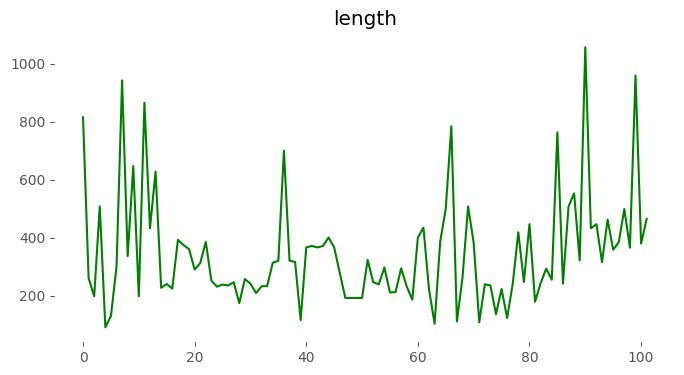

In [ ]:
from matplotlib import pyplot as plt

# Plot the 'length' column
plt.figure(figsize=(8, 4), facecolor='white')  # Change figure background to white
ax = plt.gca()
ax.set_facecolor('white')  # Change axis background to white

# Plotting the line
df['length'].plot(kind='line', ax=ax, color='green', title='length')

# Hide the top and right spines
ax.spines[['top', 'right']].set_visible(False)

plt.show()


# **Kmeans Clustering**

### **TF-IDF Vector for Kmeans**

In [ ]:
# Generating TF-IDF Vector for KMeans from the comment_body
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                ngram_range = (1,3),
                                stop_words = "english"

                            )

vectors = vectorizer.fit_transform(df.Landscape_improvment_artist)

### **Finding Optimal number of clusters**

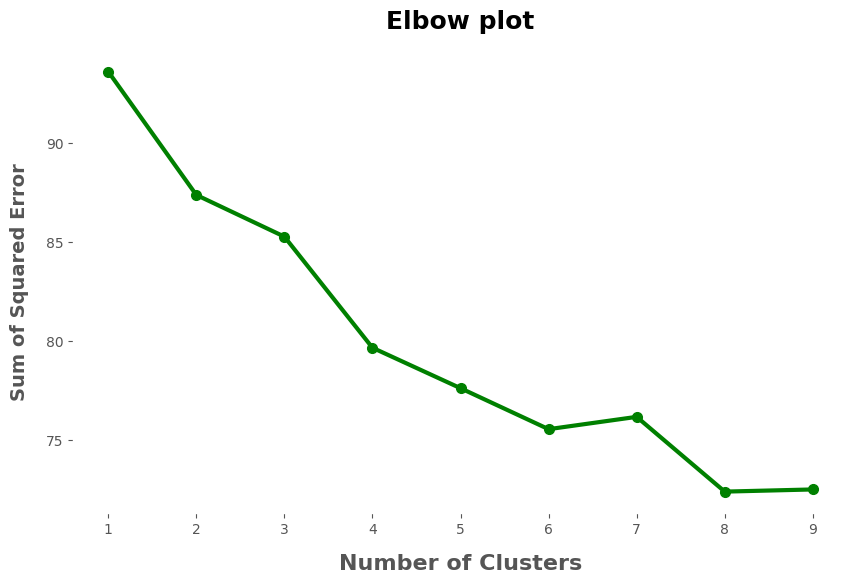

In [ ]:
from sklearn.cluster import KMeans

# Range for the number of clusters
k_range = range(1, 10)
sse = []

# Calculating SSE for different values of k
for k in k_range:
    model = KMeans(n_clusters=k, init="k-means++", random_state=38, max_iter=100, n_init=1)
    model.fit(vectors)
    sse.append(model.inertia_)

# Plotting SSE vs Number of Clusters to find the optimum number of clusters
plt.figure(figsize=(10, 6), facecolor='white')  # Change figure background to white
ax = plt.gca()
ax.set_facecolor('white')  # Change axis background to white

plt.plot(k_range, sse, color="green", marker='.', markersize=14, linewidth=3)
plt.xlabel("Number of Clusters", fontsize=16, fontweight="semibold", labelpad=12)
plt.ylabel("Sum of Squared Error", fontsize=14, fontweight="semibold", labelpad=12)
plt.title("Elbow plot", fontsize=18, pad=16, fontweight="bold")
plt.grid(True)
plt.show()


### **Optimal Clusters**

In [ ]:
# Labeling the rows of the dataframe with cluster labels
true_k = 4
model = KMeans(n_clusters=true_k, init="k-means++", random_state=48, max_iter=2000, n_init=1)
y_predicted = model.fit_predict(vectors)
df["cluster"] = y_predicted
df['cluster'].value_counts()

cluster
1    47
3    20
2    19
0    13
Name: count, dtype: int64

### **Word Cloud for the Clusters**

#### **Cluster 0**

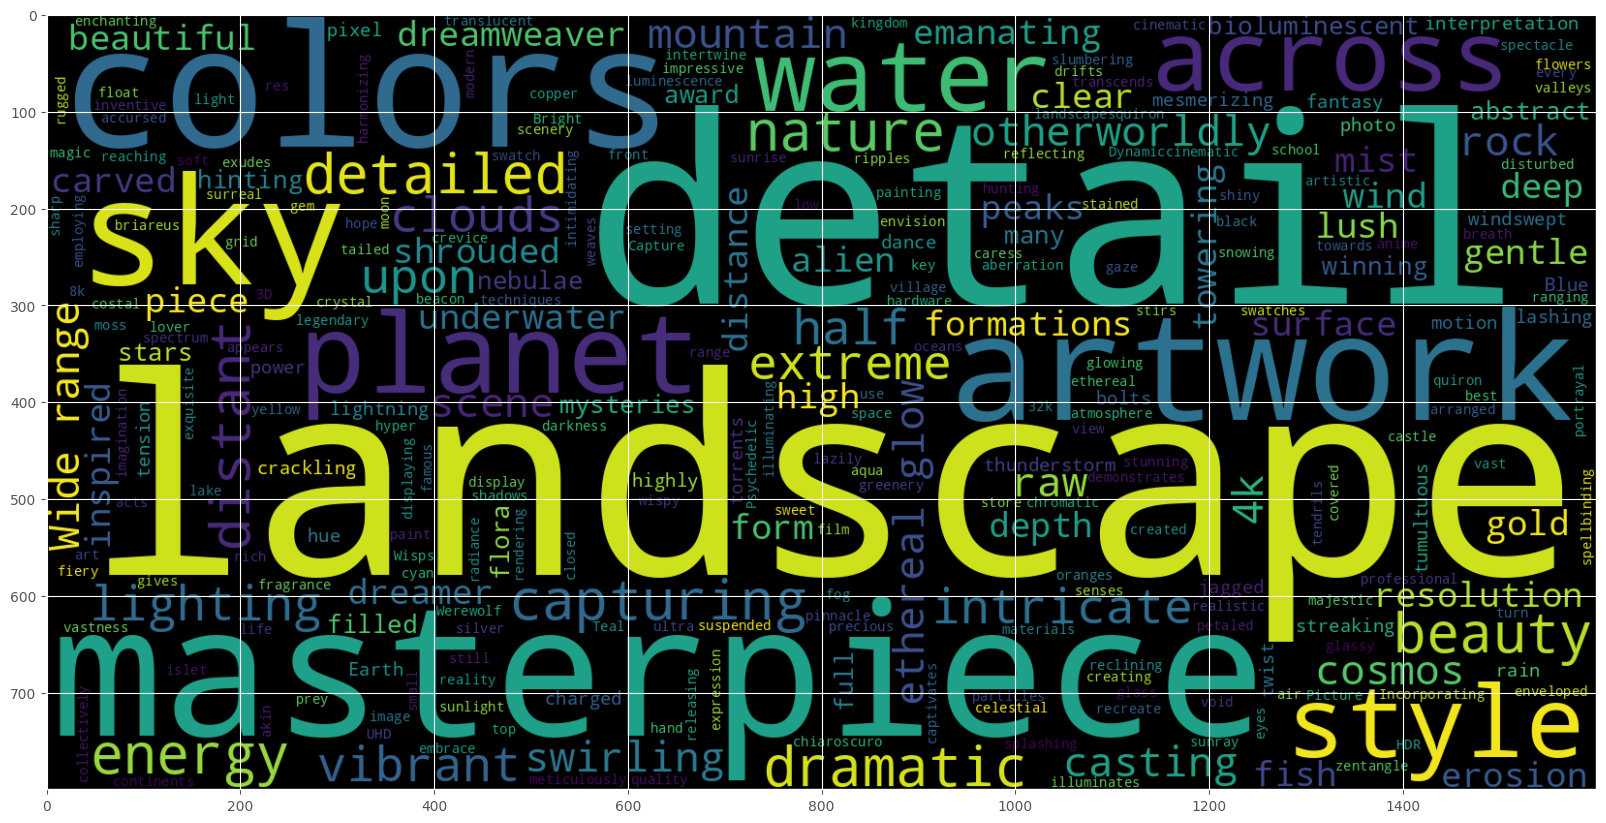

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.cluster == 0 ].Landscape_improvment_custom))
plt.imshow(wc , interpolation = 'bilinear')

#### **Cluster 1**

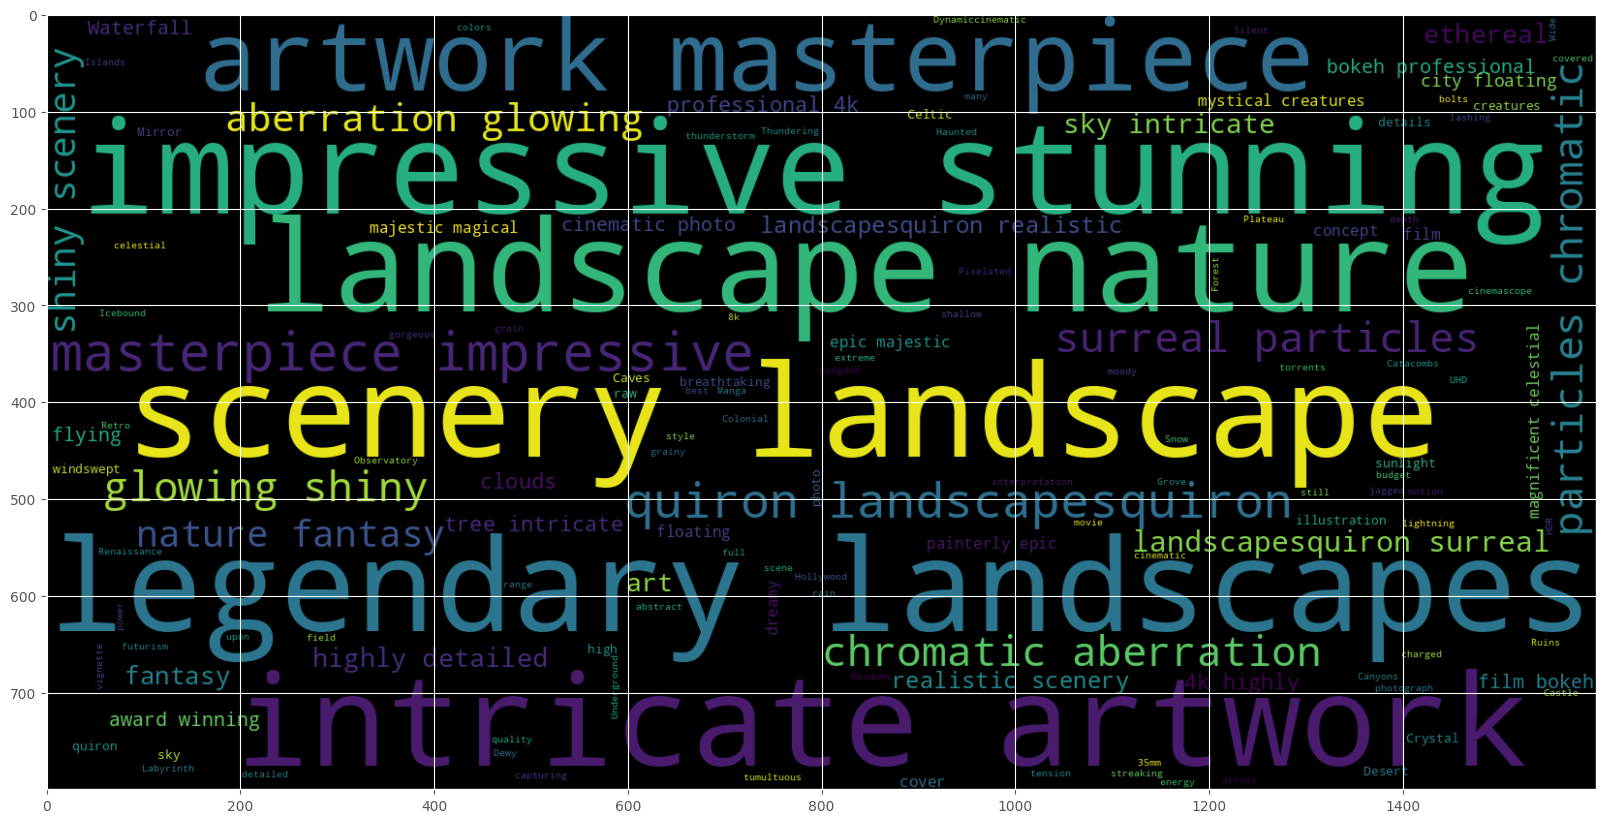

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.cluster == 1 ].Landscape_improvment_custom))
plt.imshow(wc , interpolation = 'bilinear')

#### **Cluster 2**

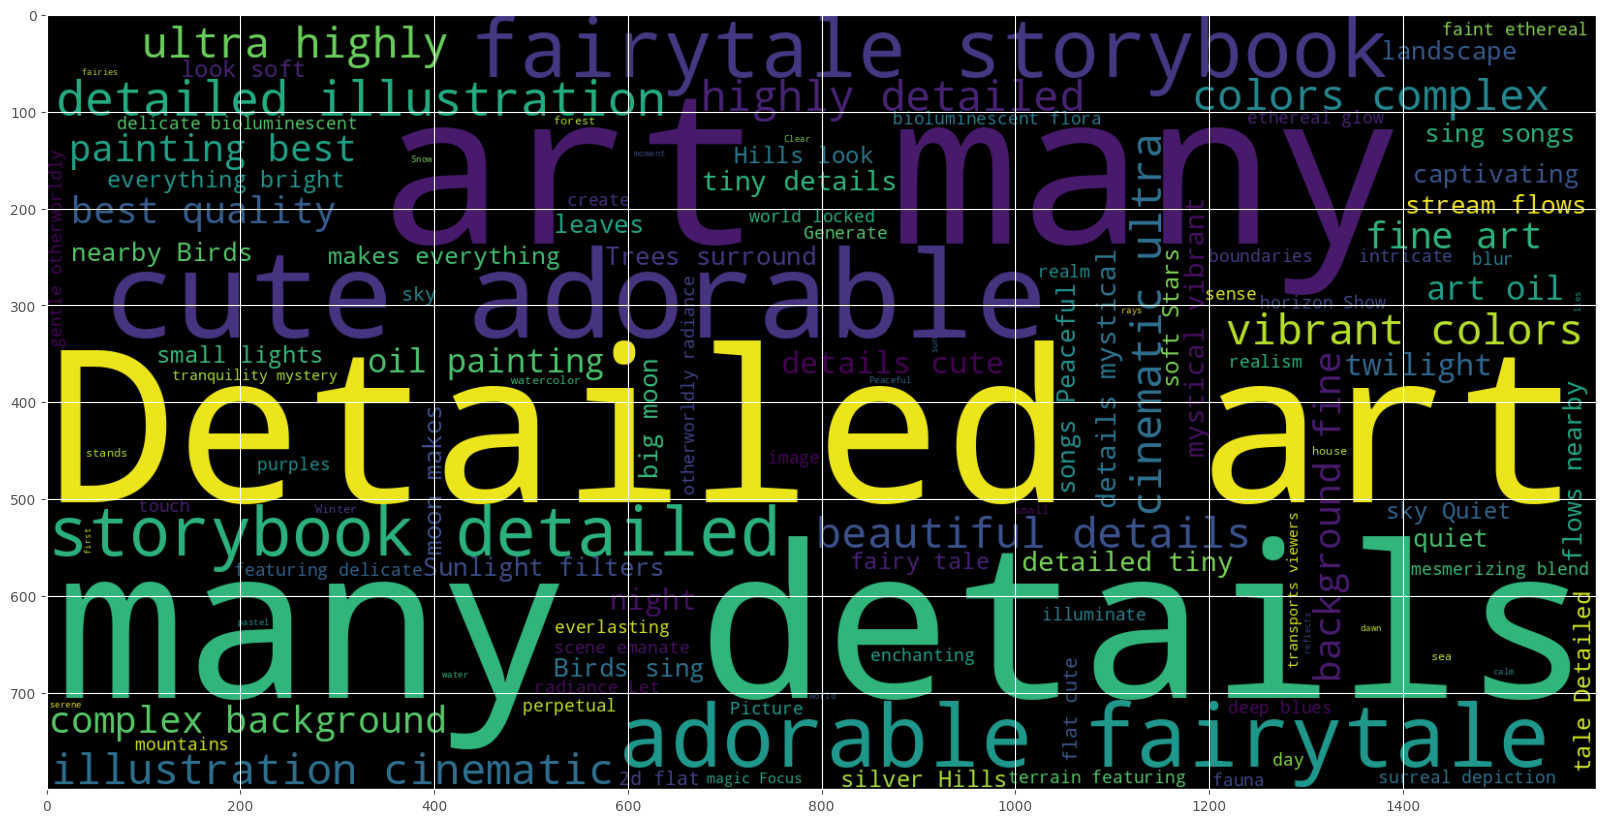

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.cluster == 2 ].Landscape_improvment_custom))
plt.imshow(wc , interpolation = 'bilinear')

#### **Cluster 3**

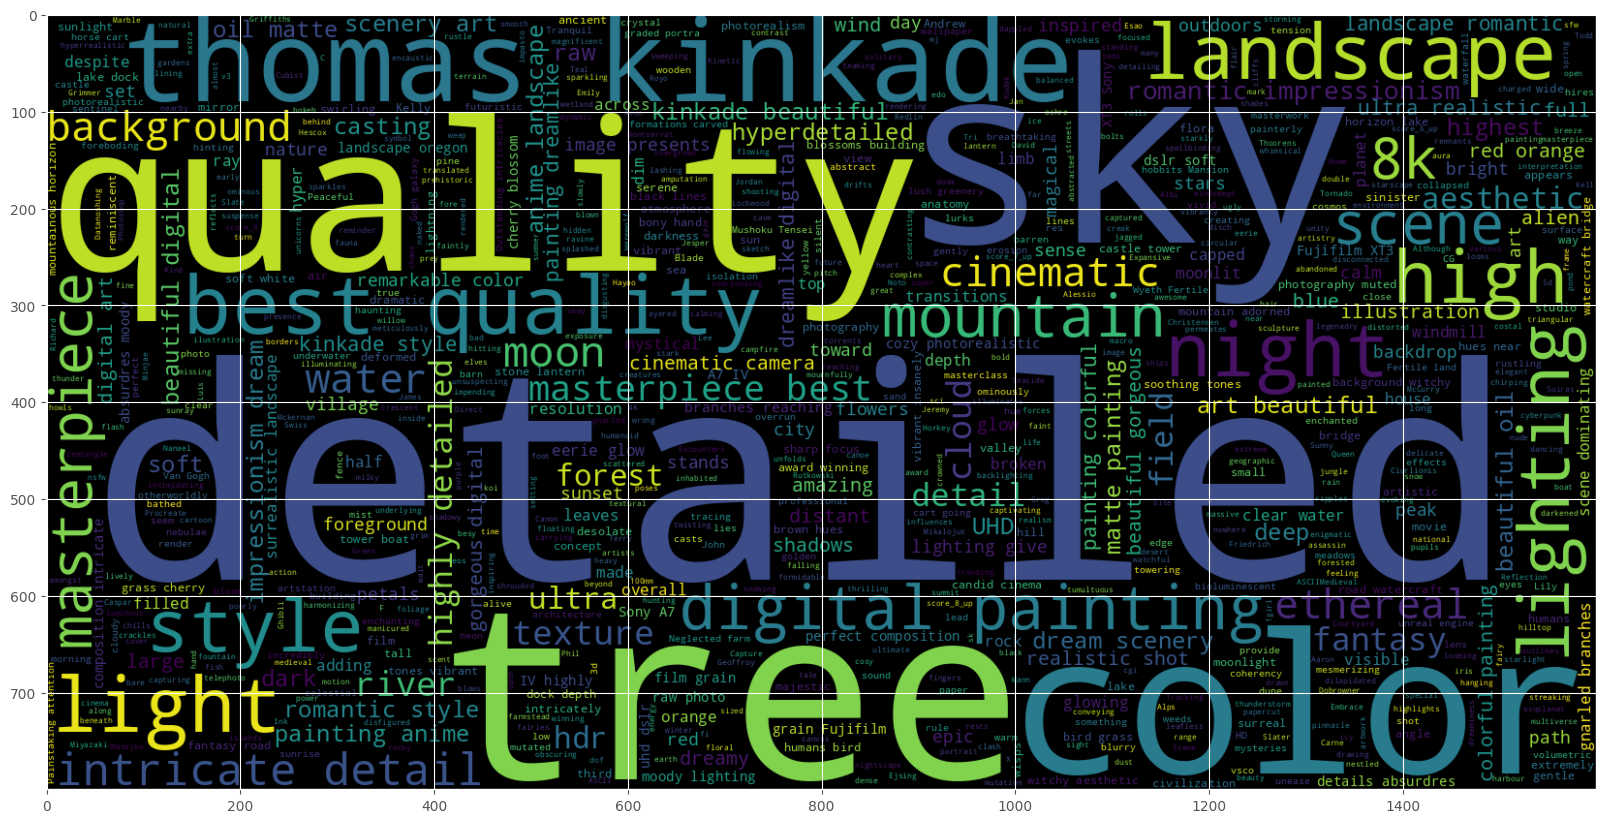

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.cluster == 3 ].Landscape_improvment_custom))
plt.imshow(wc , interpolation = 'bilinear')

### **Frequency distribution accoring to the clusters.**

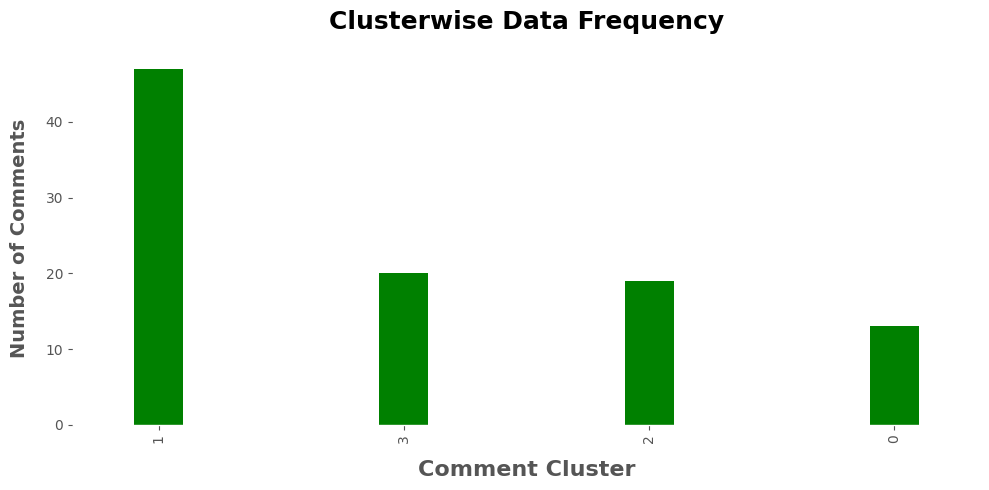

In [ ]:
# Count the occurrences of each cluster and sort by value
cluster_counts = df['cluster'].value_counts().sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 5), facecolor='white')  # Change figure background to white
ax = plt.gca()
ax.set_facecolor('white')  # Change axis background to white

cluster_counts.plot(kind='bar', width=0.2, color="green")  # Change bar color to green
plt.xlabel("Comment Cluster", fontsize=16, fontweight="semibold", labelpad=12)
plt.ylabel("Number of Comments", fontsize=14, fontweight="semibold", labelpad=12)
plt.title("Clusterwise Data Frequency", fontsize=18, pad=16, fontweight="bold")

plt.tight_layout()
plt.show()

# **Topic Modeling using LDA (Latent Dirichlet Allocation)**

### **Removing frequent and rare words**

In [ ]:
# Creating list of Frequent words from comment text
freq = pd.Series(' '.join(df['Landscape_improvment_artist']).split()).value_counts()[:15]

# Removing Frequent words from comment text
df['Landscape_improvment_custom'] = df['Landscape_improvment_custom'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [ ]:
import pandas as pd

# Assuming you have already loaded your DataFrame df

# Create a Series of word counts
all_word_series = pd.Series(' '.join(df['Landscape_improvment_artist']).split()).value_counts()

# Sort the Series by value counts in descending order
all_word_series_sorted = all_word_series.sort_values(ascending=False)

# Extract the rare words
rare = all_word_series_sorted[all_word_series_sorted < 4].index.tolist()

# Remove rare words from comment text
df['Landscape_improvment_artist'] = df['Landscape_improvment_artist'].apply(lambda x: ' '.join([word for word in x.split() if word not in rare]))

# Display the updated DataFrame
print(df.head())


                                   Prompt_improvment  \
0   ultra detailed with artistic abstract, deep f...   
1   detailed 16k resolution, high definition, sur...   
2   deep colorful digital painting layers,8K UHD ...   
3   in the style of volumetric lighting, master p...   
4  ultra-high resolution, iconoclastic, wireframe...   

                                       Random_prompt  \
0  best quality,masterpiece,realistic, detailed, ...   
1  best quality,masterpiece,realistic, detailed, ...   
2  best quality,masterpiece,realistic, detailed, ...   
3  best quality,masterpiece,realistic, detailed, ...   
4  best quality,masterpiece,realistic, detailed, ...   

                         Landscape_improvment_custom  \
0  In soft from its like gentle eyes, towards acr...   
1  (ultra high mountains, sunlight water, water w...   
2  fantasy studio quality, winning bright deep sh...   
3  an enchanting world twilight. Picture captivat...   
4                                    river, co

### **Lemmatization**

In [ ]:
# Creating nlp object
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

In [ ]:
# User defined function to perform lemmatization of the comment text
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ','VERB', 'ADV']):
       output = []
       for sent in texts:
             doc = nlp(sent)
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [ ]:
# lemmatization of the comment text
text_list=df['Landscape_improvment_artist'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

painting cyril rolando ultra high res masterpiece beautiful lighting mountains bright sunlight crystal clear water deep anime half water half water clear beautiful sky clouds depth small village
['paint', 'ultra', 'high', 'res', 'masterpiece', 'beautiful', 'lighting', 'mountain', 'bright', 'sunlight', 'crystal', 'clear', 'water', 'deep', 'anime', 'half', 'water', 'half', 'water', 'clear', 'beautiful', 'sky', 'cloud', 'depth', 'small', 'village']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original Text:
painting cyril rolando ultra high res masterpiece beautiful lighting mountains bright sunlight crystal clear water deep anime half water half water clear beautiful sky clouds depth small village
Lemmatized Text:
['painting', 'cyril', 'rolando', 'ultra', 'high', 're', 'masterpiece', 'beautiful', 'lighting', 'mountain', 'bright', 'sunlight', 'crystal', 'clear', 'water', 'deep', 'anime', 'half', 'water', 'half', 'water', 'clear', 'beautiful', 'sky', 'cloud', 'depth', 'small', 'village']


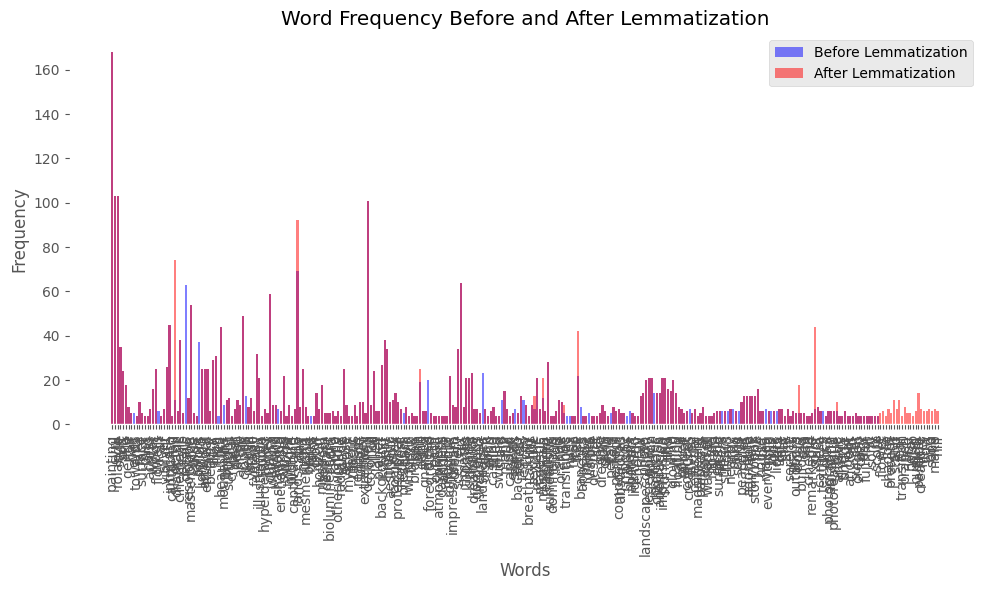

In [ ]:
import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Lemmatization function
def lemmatization(text_list):
    lemmatizer = WordNetLemmatizer()
    tokenized_reviews = []
    for text in text_list:
        tokens = word_tokenize(text)
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        tokenized_reviews.append(lemmatized_tokens)
    return tokenized_reviews

# Original text
print("Original Text:")
print(text_list[1])

# Lemmatized text
print("Lemmatized Text:")
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

# Count words before lemmatization
original_word_counts = Counter(word_tokenize(' '.join(text_list)))

# Count words after lemmatization
lemmatized_word_counts = Counter(word_tokenize(' '.join([' '.join(tokens) for tokens in tokenized_reviews])))

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')  # Change background to white
ax.set_facecolor('white')  # Change background to white
ax.bar(original_word_counts.keys(), original_word_counts.values(), alpha=0.5, color='b', label='Before Lemmatization')
ax.bar(lemmatized_word_counts.keys(), lemmatized_word_counts.values(), alpha=0.5, color='r', label='After Lemmatization')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Word Frequency Before and After Lemmatization')
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Original Text:
(ultra high mountains, sunlight water, water water (clear beautiful sky clouds, small village
Lemmatized Text:
['(', 'ultra', 'high', 'mountain', ',', 'sunlight', 'water', ',', 'water', 'water', '(', 'clear', 'beautiful', 'sky', 'cloud', ',', 'small', 'village']


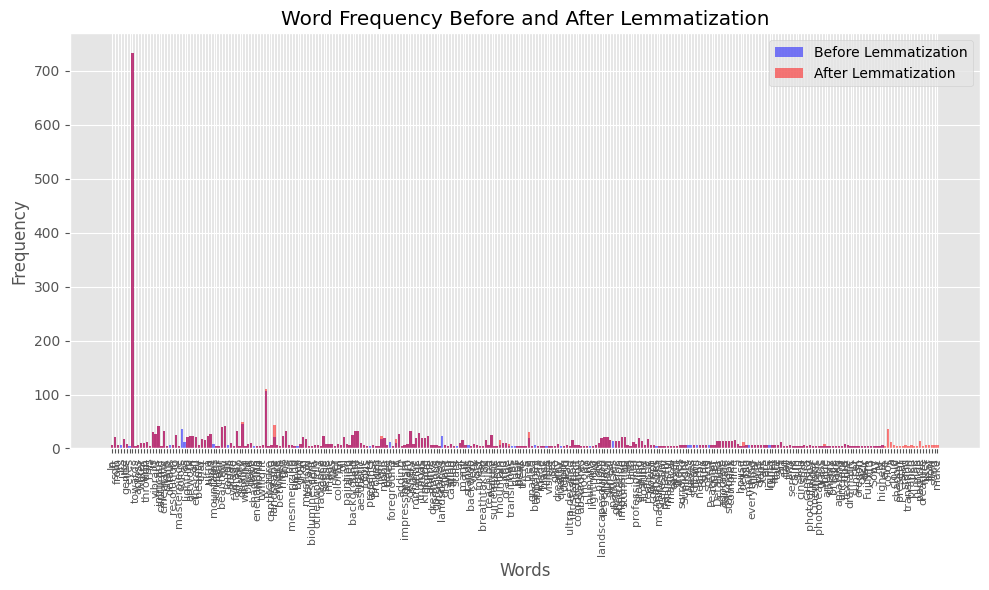

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Lemmatization function
def lemmatization(text_list):
    lemmatizer = WordNetLemmatizer()
    tokenized_reviews = []
    for text in text_list:
        tokens = word_tokenize(text)
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        tokenized_reviews.append(lemmatized_tokens)
    return tokenized_reviews

# Original text
print("Original Text:")
print(text_list[1])

# Lemmatized text
print("Lemmatized Text:")
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

# Count words before lemmatization
original_word_counts = Counter(word_tokenize(' '.join(text_list)))

# Count words after lemmatization
lemmatized_word_counts = Counter(word_tokenize(' '.join([' '.join(tokens) for tokens in tokenized_reviews])))

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(original_word_counts.keys(), original_word_counts.values(), alpha=0.5, color='b', label='Before Lemmatization')
ax.bar(lemmatized_word_counts.keys(), lemmatized_word_counts.values(), alpha=0.5, color='r', label='After Lemmatization')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Word Frequency Before and After Lemmatization')
ax.legend()
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels and adjust font size
plt.tight_layout()
plt.show()


### **Bigrams and Trigrams**

In [ ]:
# Creating bigrams and tigrams for LDA

bigram_phrases = gensim.models.Phrases(tokenized_reviews, min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[tokenized_reviews], threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(tokenized_reviews)
data_bigrams_trigrams = make_trigrams(data_bigrams)

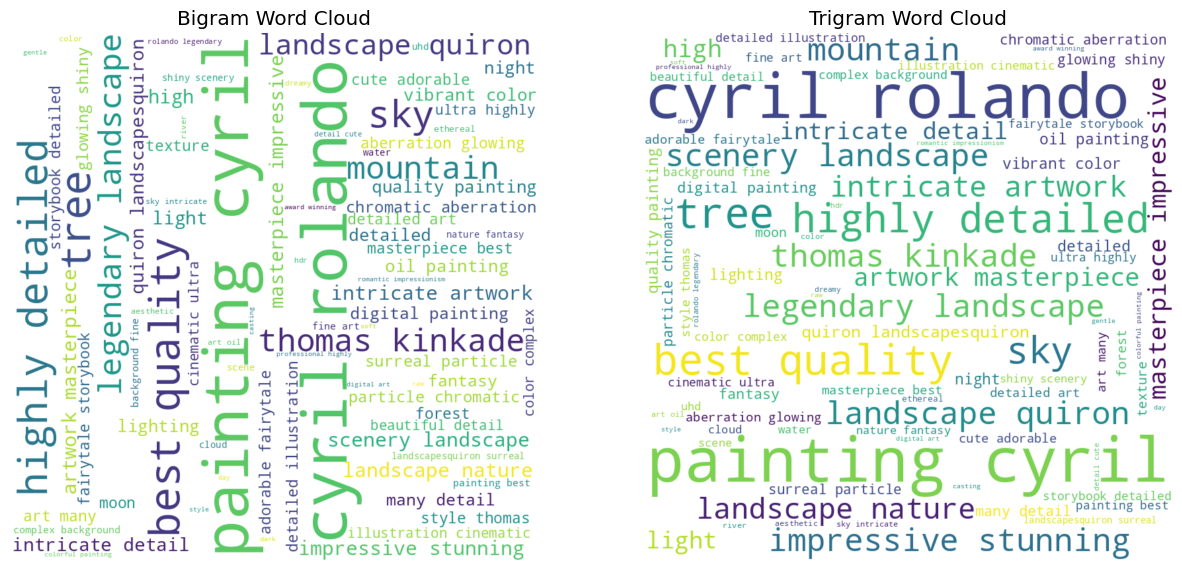

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_wordcloud(texts):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(texts))
    return wordcloud

# Generate word cloud for bigrams
bigram_wordcloud = generate_wordcloud([' '.join(doc) for doc in data_bigrams])

# Generate word cloud for trigrams
trigram_wordcloud = generate_wordcloud([' '.join(doc) for doc in data_bigrams_trigrams])

# Plot word clouds
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot bigram word cloud
axs[0].imshow(bigram_wordcloud, interpolation='bilinear')
axs[0].set_title('Bigram Word Cloud')
axs[0].axis('off')

# Plot trigram word cloud
axs[1].imshow(trigram_wordcloud, interpolation='bilinear')
axs[1].set_title('Trigram Word Cloud')
axs[1].axis('off')

plt.show()


In [ ]:
# Removing frequent words from bigrams and tigrams and generating TF-IDF model
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

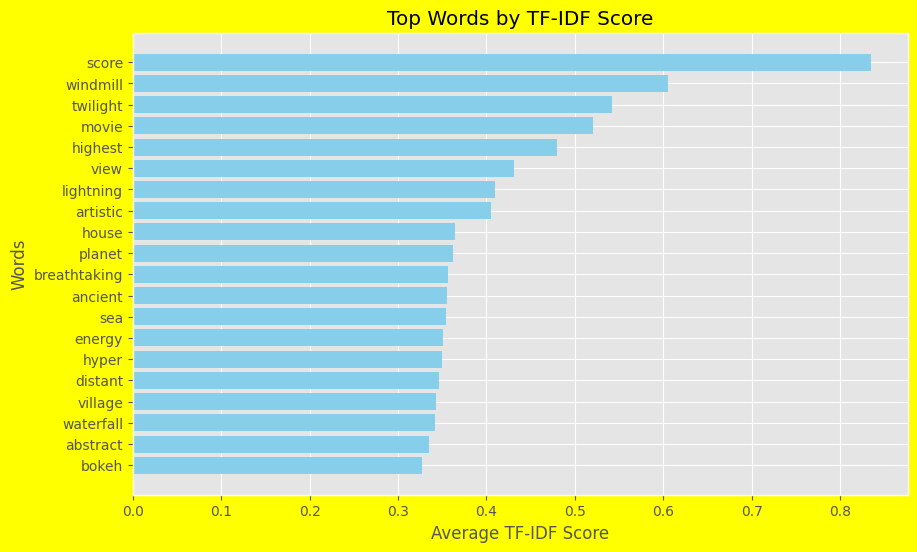

In [ ]:
import matplotlib.pyplot as plt

# Get TF-IDF scores for all words
tfidf_scores = {}
for i in range(len(corpus)):
    for word_id, score in tfidf[corpus[i]]:
        word = id2word[word_id]
        if word in tfidf_scores:
            tfidf_scores[word].append(score)
        else:
            tfidf_scores[word] = [score]

# Calculate average TF-IDF score for each word
average_tfidf_scores = {word: sum(scores) / len(scores) for word, scores in tfidf_scores.items()}

# Sort words by average TF-IDF score
sorted_words = sorted(average_tfidf_scores.items(), key=lambda x: x[1], reverse=True)

# Plot the top N words by TF-IDF score
N = 20  # Number of top words to plot
top_words = [word for word, score in sorted_words[:N]]
top_scores = [score for word, score in sorted_words[:N]]

# Create bar chart
plt.figure(figsize=(10, 6), facecolor='yellow')  # Set background color to white
plt.barh(top_words, top_scores, color='skyblue')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Words')
plt.title('Top Words by TF-IDF Score')
plt.gca().invert_yaxis()  # Invert y-axis to display highest scores at the top
plt.show()



### **Finding Optimum topic number**

In [ ]:
## Function to calculate Coherence Value for Various Model taken from stackoverflow

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state= 1)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
## Generating LDA model and calculating Coherence score for them.

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=tokenized_reviews, start=1, limit=10, step=1)

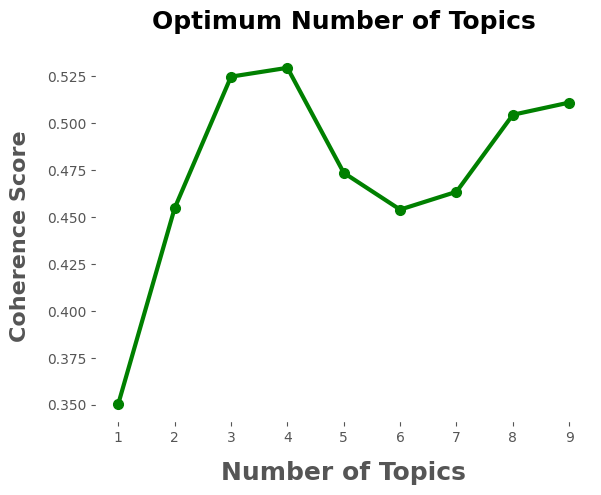

In [ ]:
limit = 10
start = 1
step = 1

x = range(start, limit, step)

plt.plot(x, coherence_values, color="#008000", marker='.', markersize=14, linewidth=3)
plt.title("Optimum Number of Topics", fontsize=18, fontweight="bold", pad=16)
plt.xlabel("Number of Topics", fontsize=18, fontweight="semibold", labelpad=12)
plt.ylabel("Coherence Score", fontsize=16, fontweight="semibold", labelpad=12)

# Set background color to white
plt.gca().set_facecolor('white')

plt.show()


In [ ]:
# Printing the coherence scores

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3505
Num Topics = 2  has Coherence Value of 0.4547
Num Topics = 3  has Coherence Value of 0.5247
Num Topics = 4  has Coherence Value of 0.5294
Num Topics = 5  has Coherence Value of 0.4735
Num Topics = 6  has Coherence Value of 0.4539
Num Topics = 7  has Coherence Value of 0.4634
Num Topics = 8  has Coherence Value of 0.5044
Num Topics = 9  has Coherence Value of 0.5109


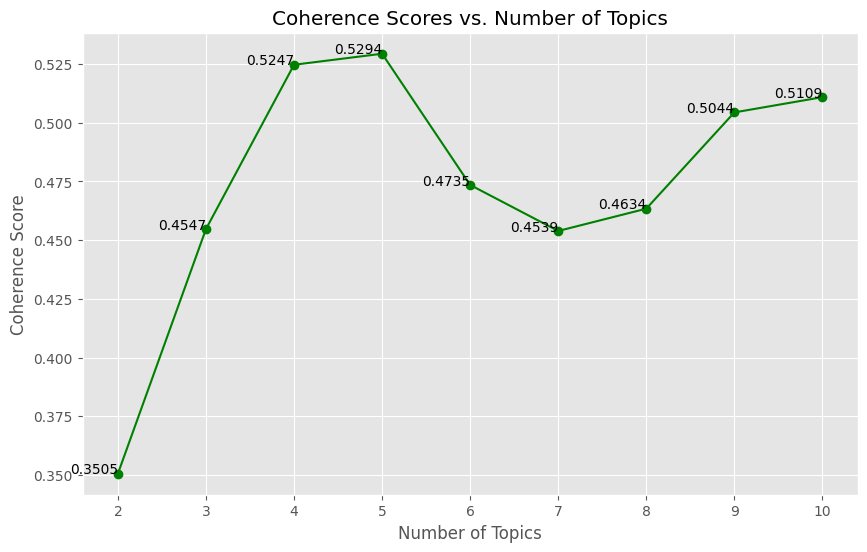

In [ ]:
import matplotlib.pyplot as plt

# Assuming x contains the number of topics and coherence_values contains the corresponding coherence scores
x = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Adjust the number of topics as needed
coherence_values = [0.3505, 0.4547, 0.5247, 0.5294, 0.4735, 0.4539, 0.4634, 0.5044, 0.5109]  # Replace with your obtained coherence values

# Plot the coherence scores
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_values, marker='o', linestyle='-', color='green')  # Change line color to green
for m, cv in zip(x, coherence_values):
    plt.text(m, cv, f'{round(cv, 4)}', ha='right')  # Add coherence values as text on each point
plt.title('Coherence Scores vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(x)
plt.grid(True)
plt.show()



### **Optimum Model for LDA**

In [ ]:
# Select the model and print the topics
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.264*"," + 0.019*"intricate" + 0.017*"high" + 0.016*"scenery" + 0.014*"quality" + 0.013*"landscape" + 0.013*"nature" + 0.013*"sky" + 0.012*"quiron" + 0.012*"artwork"'),
 (1,
  '0.090*"," + 0.074*"." + 0.018*"an" + 0.014*"color" + 0.014*"A" + 0.013*"on" + 0.013*"vibrant" + 0.013*"best" + 0.013*"landscape" + 0.012*"that"'),
 (2,
  '0.087*"," + 0.038*"." + 0.017*"sky" + 0.017*"ultra" + 0.016*"A" + 0.015*"is" + 0.015*"The" + 0.014*"cinematic" + 0.013*"landscape" + 0.012*"art"'),
 (3,
  '0.086*"," + 0.041*"." + 0.021*"The" + 0.019*"like" + 0.019*"to" + 0.018*"is" + 0.016*"moon" + 0.013*"vibrant" + 0.012*"color" + 0.012*"a"'),
 (4,
  '0.213*"," + 0.020*"." + 0.016*"beautiful" + 0.013*"quality" + 0.013*"style" + 0.012*"tree" + 0.011*"kinkade" + 0.011*"sky" + 0.011*"digital" + 0.011*"thomas"')]

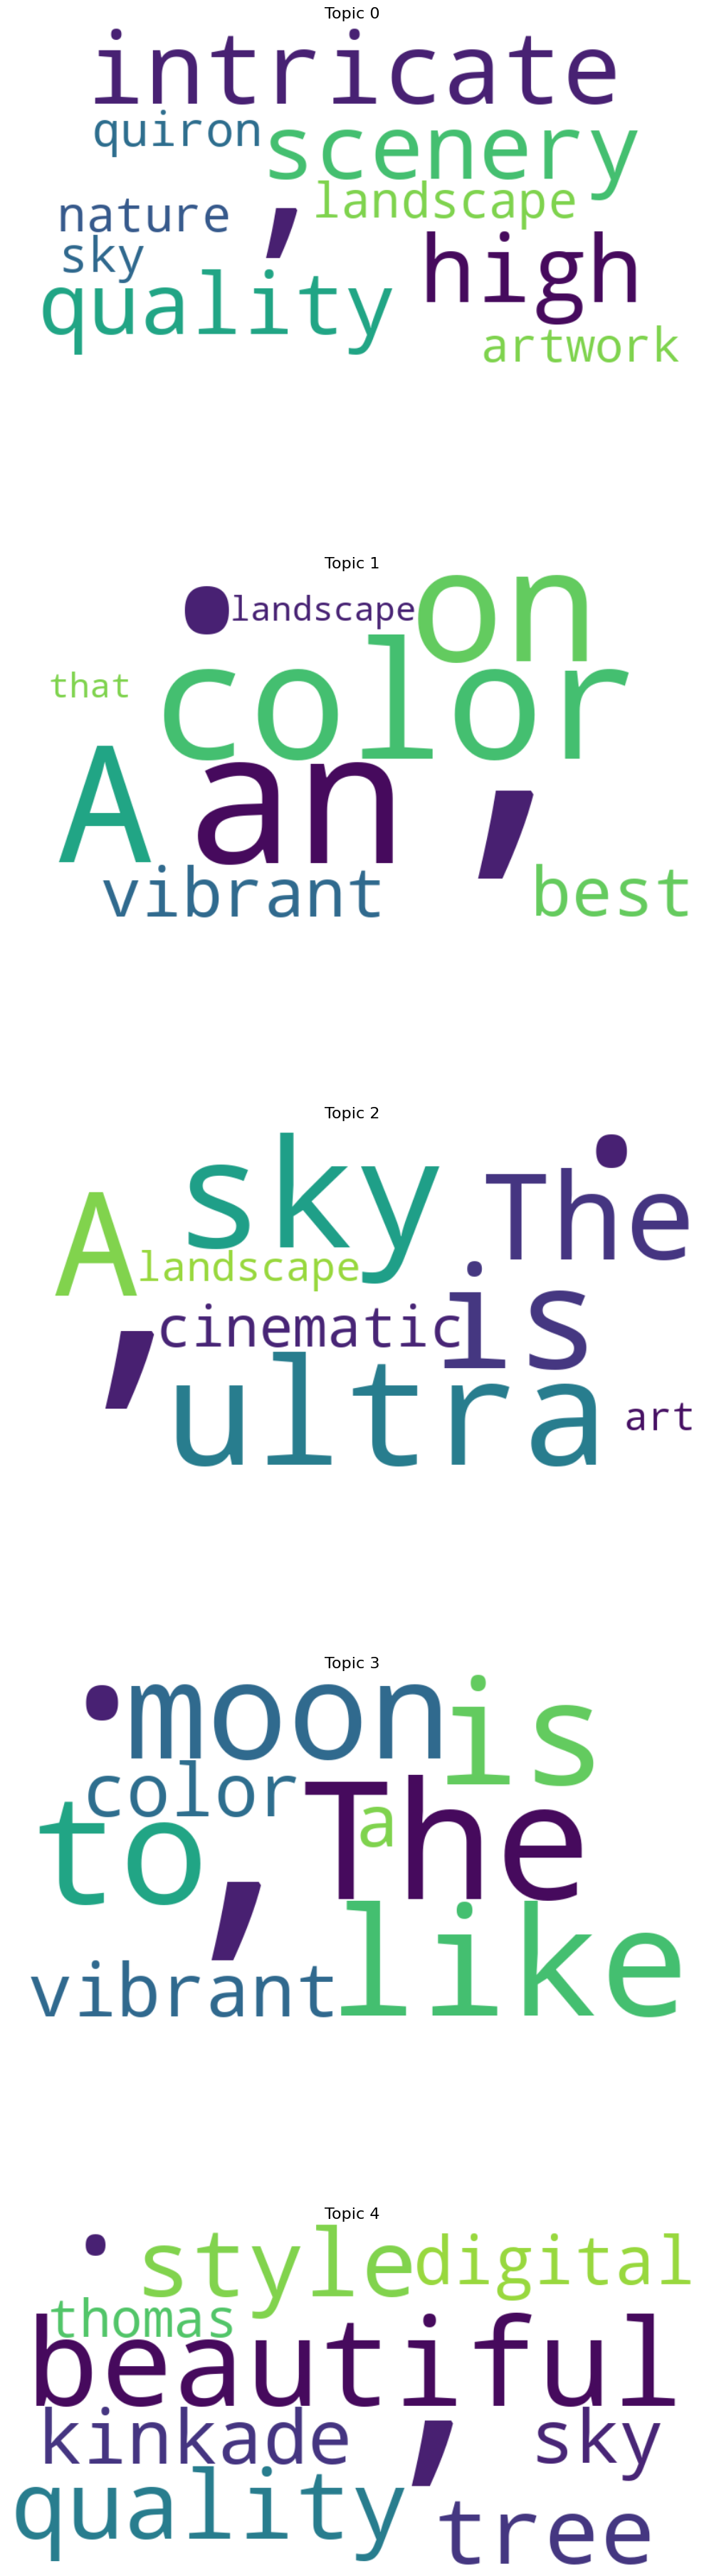

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract topics and their words from the optimal model
topics = optimal_model.show_topics(formatted=False)

# Create word clouds for each topic
fig, axs = plt.subplots(len(topics), 1, figsize=(10, 8 * len(topics)))

for i, (topic_id, topic_words) in enumerate(topics):
    wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate_from_frequencies(dict(topic_words))
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(f'Topic {topic_id}', fontsize=16)
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Visualizing the topics with gensim heatmap

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

IndexError: index 259 is out of bounds for axis 1 with size 259

In [ ]:
# Obtaining the main topic for each review:

lda_corpus = optimal_model[corpus]

all_topics = optimal_model.get_document_topics(corpus)
all_topics
num_docs = len(all_topics)
num_docs
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_csr
all_topics_numpy= all_topics_csr.T.toarray()
all_topics_numpy
major_topic= [np.argmax(arr) for arr in all_topics_numpy]
df['major_topic']= major_topic
df.head()

Prompt_improvment  \
0   ultra detailed with artistic abstract, deep f...   
1   detailed 16k resolution, high definition, sur...   
2   deep colorful digital painting layers,8K UHD ...   
3   in the style of volumetric lighting, master p...   
4  ultra-high resolution, iconoclastic, wireframe...   

                                       Random_prompt  \
0  best quality,masterpiece,realistic, detailed, ...   
1  best quality,masterpiece,realistic, detailed, ...   
2  best quality,masterpiece,realistic, detailed, ...   
3  best quality,masterpiece,realistic, detailed, ...   
4  best quality,masterpiece,realistic, detailed, ...   

                         Landscape_improvment_custom  \
0  In soft from its like gentle eyes, towards acr...   
1  (ultra high mountains, sunlight water, water w...   
2  fantasy studio quality, winning bright deep sh...   
3  an enchanting world twilight. Picture captivat...   
4                                    river, colorful   

                         Landscape_improvment_artist  \
0  cyril rolando stained glass envision slumberin...   
1  cyril rolando ultra high res lighting lush gre...   
2  cyril rolando fantasy illustration john howe j...   
3  cyril rolando generate enchanting surreal depi...   
4  cyril rolando unreal engine render jungle rive...   

                         Prompt_improvment_by_artist  logo  journal_prompts  \
0  painting by Cyril Rolando, ultra detailed with...   NaN              NaN   
1  painting by Cyril Rolando, detailed 16k resolu...   NaN              NaN   
2  painting by Cyril Rolando, deep colorful digit...   NaN              NaN   
3  painting by Cyril Rolando, in the style of vol...   NaN              NaN   
4  painting by Cyril Rolando, ultra-high resoluti...   NaN              NaN   

   journal_p_improvement  word_count  length  cluster  major_topic  
0                    NaN         150  1023.0        0            3  
1                    NaN          41   301.0        3            0  
2                    NaN          24   191.0        3            3  
3                    NaN         100   645.0        2            1  
4                    NaN          10    76.0        3            2

In [ ]:
import matplotlib.pyplot as plt

# Set the background color to white
plt.style.use('default')

# Count the occurrences of each major topic
topic_counts = df['major_topic'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(topic_counts.index, topic_counts.values, color='green')
plt.title('Distribution of Major Topics')
plt.xlabel('Major Topic')
plt.ylabel('Number of Documents')
plt.xticks(topic_counts.index)
plt.grid(axis='y')
plt.show()




KeyError: 'major_topic'

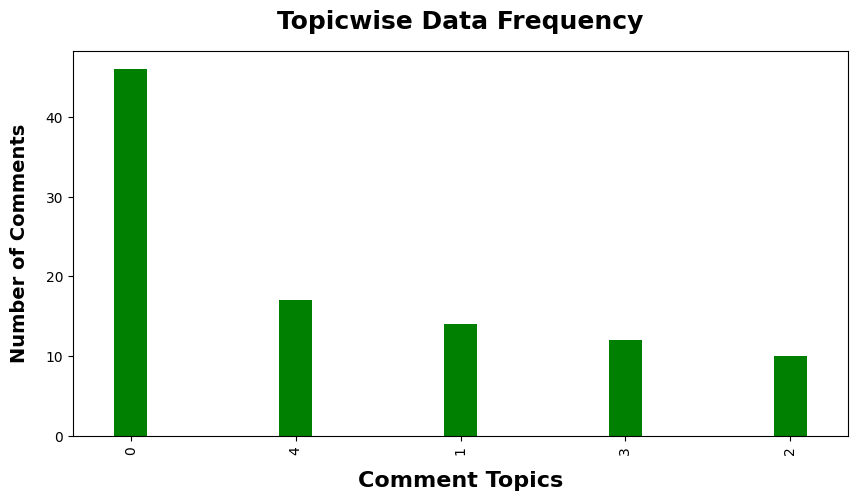

In [ ]:
import matplotlib.pyplot as plt

# Set the background color to white
plt.style.use('default')

# Plotting Data frequency for topics
df['major_topic'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), width=0.2, color='green')

plt.xlabel("Comment Topics", fontsize=16, fontweight="semibold", labelpad=12)
plt.ylabel("Number of Comments", fontsize=14, fontweight="semibold", labelpad=12)
plt.title("Topicwise Data Frequency", fontsize=18, pad=16, fontweight="bold")

plt.show()


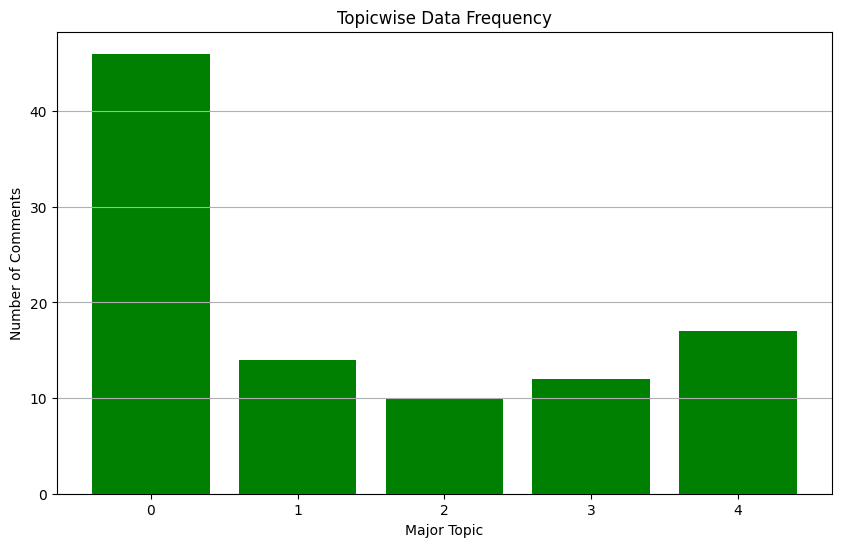

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each major topic and sort by index
topic_counts = df['major_topic'].value_counts().sort_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(topic_counts.index, topic_counts.values, color='green')
plt.title('Topicwise Data Frequency')
plt.xlabel('Major Topic')
plt.ylabel('Number of Comments')
plt.xticks(topic_counts.index)
plt.grid(axis='y')
plt.show()


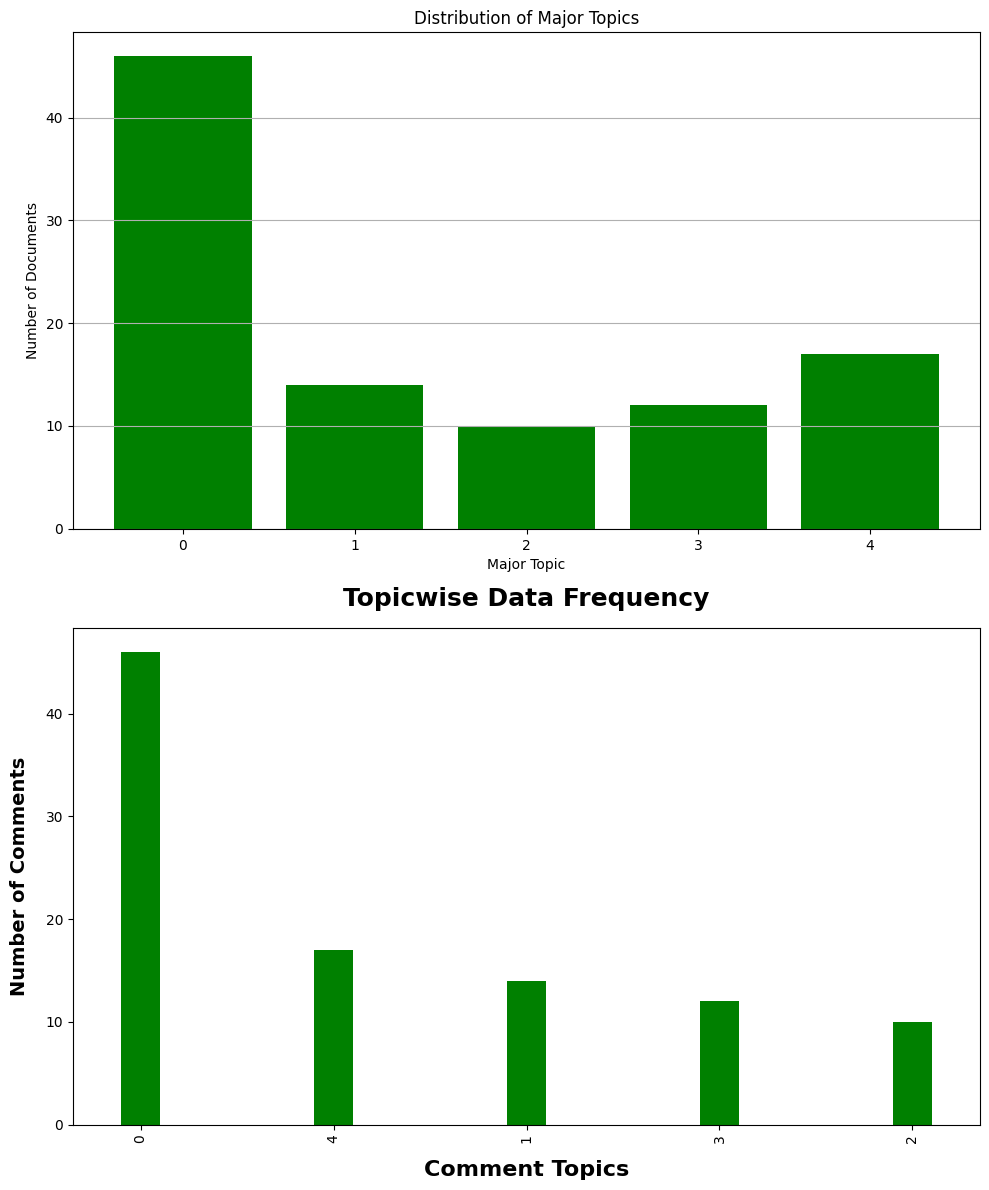

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each major topic
topic_counts = df['major_topic'].value_counts().sort_index()

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot the distribution of major topics
ax1.bar(topic_counts.index, topic_counts.values, color='green')
ax1.set_title('Distribution of Major Topics')
ax1.set_xlabel('Major Topic')
ax1.set_ylabel('Number of Documents')
ax1.set_xticks(topic_counts.index)
ax1.grid(axis='y')

# Plot the topicwise data frequency
df['major_topic'].value_counts().sort_values(ascending=False).plot(kind='bar', ax=ax2, width=0.2, color='green')
ax2.set_xlabel("Comment Topics", fontsize=16, fontweight="semibold", labelpad=12)
ax2.set_ylabel("Number of Comments", fontsize=14, fontweight="semibold", labelpad=12)
ax2.set_title("Topicwise Data Frequency", fontsize=18, pad=16, fontweight="bold")

plt.tight_layout()
plt.show()



# **Pivot table and data visualization according to Clusters and Topics**

# **Sentiment Analysis**

### **VADER(Valence Aware Dictionary for sEntiment Reasoning) sentiment analysis**

In [ ]:
## Creating Vader object for Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

analyser = SentimentIntensityAnalyzer()

In [ ]:
# Calculating Polarity and adding the scores inside the existing dataframe
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Landscape_improvment_artist']
    id = row['Landscape_improvment_custom']
    result[id] = analyser.polarity_scores(text)

# Convert result dictionary into dataframe
df_sentiment = pd.DataFrame(result).T

# Merge result with the input dataframe
df_sentiment = df_sentiment.reset_index().rename(columns={'index':'Landscape_improvment_custom'})
df_sentiment = df.merge(df_sentiment, how='left')
df_sentiment.head()

  0%|          | 0/99 [00:00<?, ?it/s]

Prompt_improvment  \
0   ultra detailed with artistic abstract, deep f...   
1   detailed 16k resolution, high definition, sur...   
2   deep colorful digital painting layers,8K UHD ...   
3   in the style of volumetric lighting, master p...   
4  ultra-high resolution, iconoclastic, wireframe...   

                                       Random_prompt  \
0  best quality,masterpiece,realistic, detailed, ...   
1  best quality,masterpiece,realistic, detailed, ...   
2  best quality,masterpiece,realistic, detailed, ...   
3  best quality,masterpiece,realistic, detailed, ...   
4  best quality,masterpiece,realistic, detailed, ...   

                         Landscape_improvment_custom  \
0  In soft from its like gentle eyes, towards acr...   
1  (ultra high mountains, sunlight water, water w...   
2  fantasy studio quality, winning bright deep sh...   
3  an enchanting world twilight. Picture captivat...   
4                                    river, colorful   

                         Landscape_improvment_artist  \
0  cyril rolando stained glass envision slumberin...   
1  cyril rolando ultra high res lighting lush gre...   
2  cyril rolando fantasy illustration john howe j...   
3  cyril rolando generate enchanting surreal depi...   
4  cyril rolando unreal engine render jungle rive...   

                         Prompt_improvment_by_artist  logo  journal_prompts  \
0  painting by Cyril Rolando, ultra detailed with...   NaN              NaN   
1  painting by Cyril Rolando, detailed 16k resolu...   NaN              NaN   
2  painting by Cyril Rolando, deep colorful digit...   NaN              NaN   
3  painting by Cyril Rolando, in the style of vol...   NaN              NaN   
4  painting by Cyril Rolando, ultra-high resoluti...   NaN              NaN   

   journal_p_improvement  word_count  length  cluster  major_topic    neg  \
0                    NaN         150  1023.0        0            3  0.038   
1                    NaN          41   301.0        3            0  0.000   
2                    NaN          24   191.0        3            3  0.000   
3                    NaN         100   645.0        2            1  0.000   
4                    NaN          10    76.0        3            2  0.000   

     neu    pos  compound  
0  0.691  0.271    0.9819  
1  0.776  0.224    0.7964  
2  0.671  0.329    0.8689  
3  0.820  0.180    0.8555  
4  1.000  0.000    0.0000

In [ ]:
# Function to label the sentiment according to score
def get_tag(val):
    if val <= -0.50:
        return 'Negative'
    elif val > -0.5 and val < 0:
        return 'Somewhat Negative'
    elif val < 0.5 and val > 0:
        return 'Somewhat Positive'
    elif val >= 0.5:
        return 'Positive'
    else:
        return 'Neutral'

In [ ]:
# Adding Sentiment Labels to dataframe

df_sentiment['Sentiment'] = df_sentiment['compound'].apply(get_tag)
df_sentiment.head()

Prompt_improvment  \
0   ultra detailed with artistic abstract, deep f...   
1   detailed 16k resolution, high definition, sur...   
2   deep colorful digital painting layers,8K UHD ...   
3   in the style of volumetric lighting, master p...   
4  ultra-high resolution, iconoclastic, wireframe...   

                                       Random_prompt  \
0  best quality,masterpiece,realistic, detailed, ...   
1  best quality,masterpiece,realistic, detailed, ...   
2  best quality,masterpiece,realistic, detailed, ...   
3  best quality,masterpiece,realistic, detailed, ...   
4  best quality,masterpiece,realistic, detailed, ...   

                         Landscape_improvment_custom  \
0  In soft from its like gentle eyes, towards acr...   
1  (ultra high mountains, sunlight water, water w...   
2  fantasy studio quality, winning bright deep sh...   
3  an enchanting world twilight. Picture captivat...   
4                                    river, colorful   

                         Landscape_improvment_artist  \
0  cyril rolando stained glass envision slumberin...   
1  cyril rolando ultra high res lighting lush gre...   
2  cyril rolando fantasy illustration john howe j...   
3  cyril rolando generate enchanting surreal depi...   
4  cyril rolando unreal engine render jungle rive...   

                         Prompt_improvment_by_artist  logo  journal_prompts  \
0  painting by Cyril Rolando, ultra detailed with...   NaN              NaN   
1  painting by Cyril Rolando, detailed 16k resolu...   NaN              NaN   
2  painting by Cyril Rolando, deep colorful digit...   NaN              NaN   
3  painting by Cyril Rolando, in the style of vol...   NaN              NaN   
4  painting by Cyril Rolando, ultra-high resoluti...   NaN              NaN   

   journal_p_improvement  word_count  length  cluster  major_topic    neg  \
0                    NaN         150  1023.0        0            3  0.038   
1                    NaN          41   301.0        3            0  0.000   
2                    NaN          24   191.0        3            3  0.000   
3                    NaN         100   645.0        2            1  0.000   
4                    NaN          10    76.0        3            2  0.000   

     neu    pos  compound Sentiment  
0  0.691  0.271    0.9819  Positive  
1  0.776  0.224    0.7964  Positive  
2  0.671  0.329    0.8689  Positive  
3  0.820  0.180    0.8555  Positive  
4  1.000  0.000    0.0000   Neutral

### **Visualization of Sentiment Analysis**

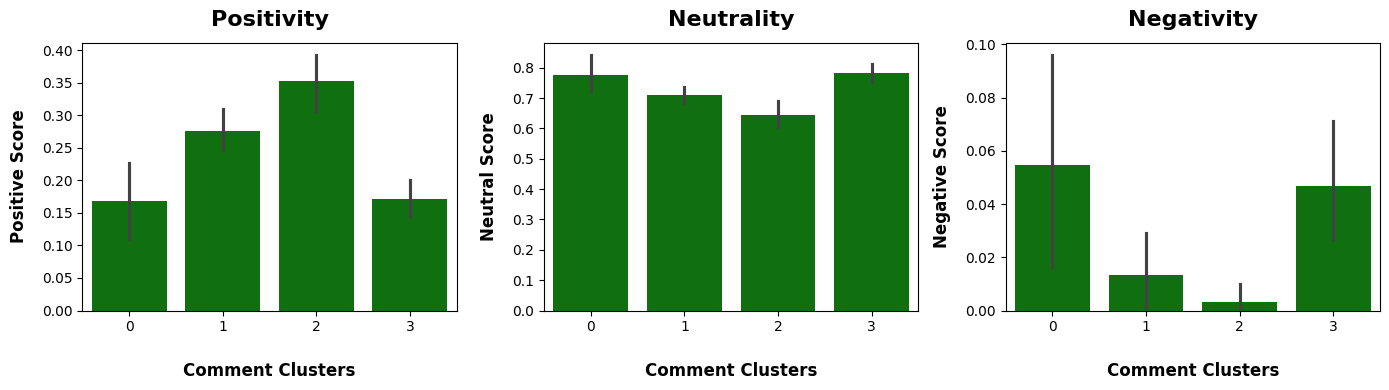

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

sns.barplot(data=df_sentiment, x='cluster', y='pos', ax=axs[0], color='green')
sns.barplot(data=df_sentiment, x='cluster', y='neu', ax=axs[1], color='green')
sns.barplot(data=df_sentiment, x='cluster', y='neg', ax=axs[2], color='green')

axs[0].set_title('Positivity', fontsize=16, pad=12, fontweight="bold")
axs[1].set_title('Neutrality', fontsize=16, pad=12, fontweight="bold")
axs[2].set_title('Negativity', fontsize=16, pad=12, fontweight="bold")

axs[0].set_xlabel("Comment Clusters", fontsize=12, fontweight="semibold", labelpad=20)
axs[1].set_xlabel("Comment Clusters", fontsize=12, fontweight="semibold", labelpad=20)
axs[2].set_xlabel("Comment Clusters", fontsize=12, fontweight="semibold", labelpad=20)

axs[0].set_ylabel("Positive Score", fontsize=12, fontweight="semibold", labelpad=10)
axs[1].set_ylabel("Neutral Score", fontsize=12, fontweight="semibold", labelpad=10)
axs[2].set_ylabel("Negative Score", fontsize=12, fontweight="semibold", labelpad=10)

plt.tight_layout()
plt.show()


In [ ]:
vis_dfS = pd.pivot_table(df_sentiment, index= "cluster", columns = "Sentiment", values = "compound")
vis_dfS

Sentiment  Negative  Neutral  Positive  Somewhat Negative  Somewhat Positive
cluster                                                                     
0          -0.55620      0.0  0.826414          -0.202300           0.264800
1               NaN      NaN  0.783490                NaN           0.458800
2               NaN      NaN  0.930967                NaN                NaN
3          -0.81572      0.0  0.841083          -0.247333           0.319629

In [ ]:
import matplotlib.colors
color_map2 = matplotlib.colors.ListedColormap(["#FF4A4A","#FFD372","#829460", "#FF8787", "#C5D8A4"])

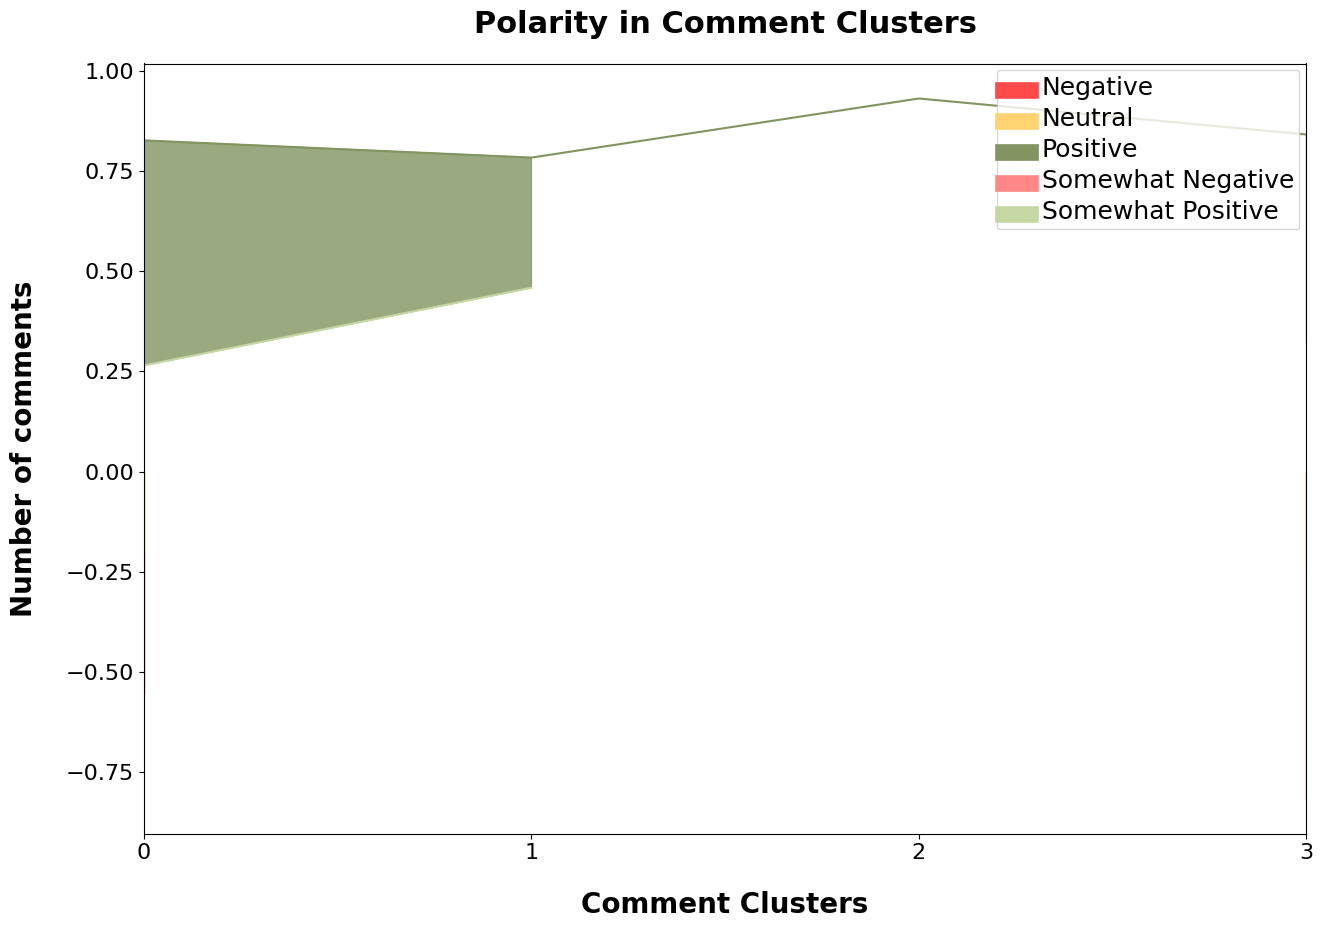

In [ ]:
ax = vis_dfS.plot(xticks=vis_dfS.index, ylabel="Number of comments", figsize=(15,10), fontsize=16, colormap=color_map2)

ax.set_xlabel("Comment Clusters", fontsize=20, fontweight="semibold", labelpad=20)
ax.set_ylabel("Number of comments", fontsize=20, fontweight="semibold", labelpad=20)
ax.set_title("Polarity in Comment Clusters", fontsize=22,pad=22, fontweight="bold" )

ax.fill_between(vis_dfS.index, vis_dfS["Negative"], color = '#FF4A4A', alpha= 0.7)
ax.fill_between(vis_dfS.index, vis_dfS["Negative"], vis_dfS["Somewhat Negative"], color = '#FF8787', alpha= 0.7)
ax.fill_between(vis_dfS.index,vis_dfS["Somewhat Negative"], vis_dfS["Neutral"],color = '#FFD372' , alpha= 0.7)
ax.fill_between(vis_dfS.index, vis_dfS["Neutral"], vis_dfS["Somewhat Positive"], color = '#C5D8A4', alpha= 0.7)
ax.fill_between(vis_dfS.index,vis_dfS["Somewhat Positive"], vis_dfS["Positive"],color = '#829460' , alpha= 0.8)

plt.xlim(0,3)

leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(12)
for text in leg.get_texts():
    text.set_fontsize(18)

plt.show()

In [ ]:
vis_dfS2 = pd.pivot_table(df_sentiment, index= "cluster", columns = "Sentiment", values = "compound")
vis_dfS2

Sentiment  Negative  Neutral  Positive  Somewhat Negative  Somewhat Positive
cluster                                                                     
0          -0.55620      0.0  0.826414          -0.202300           0.264800
1               NaN      NaN  0.783490                NaN           0.458800
2               NaN      NaN  0.930967                NaN                NaN
3          -0.81572      0.0  0.841083          -0.247333           0.319629

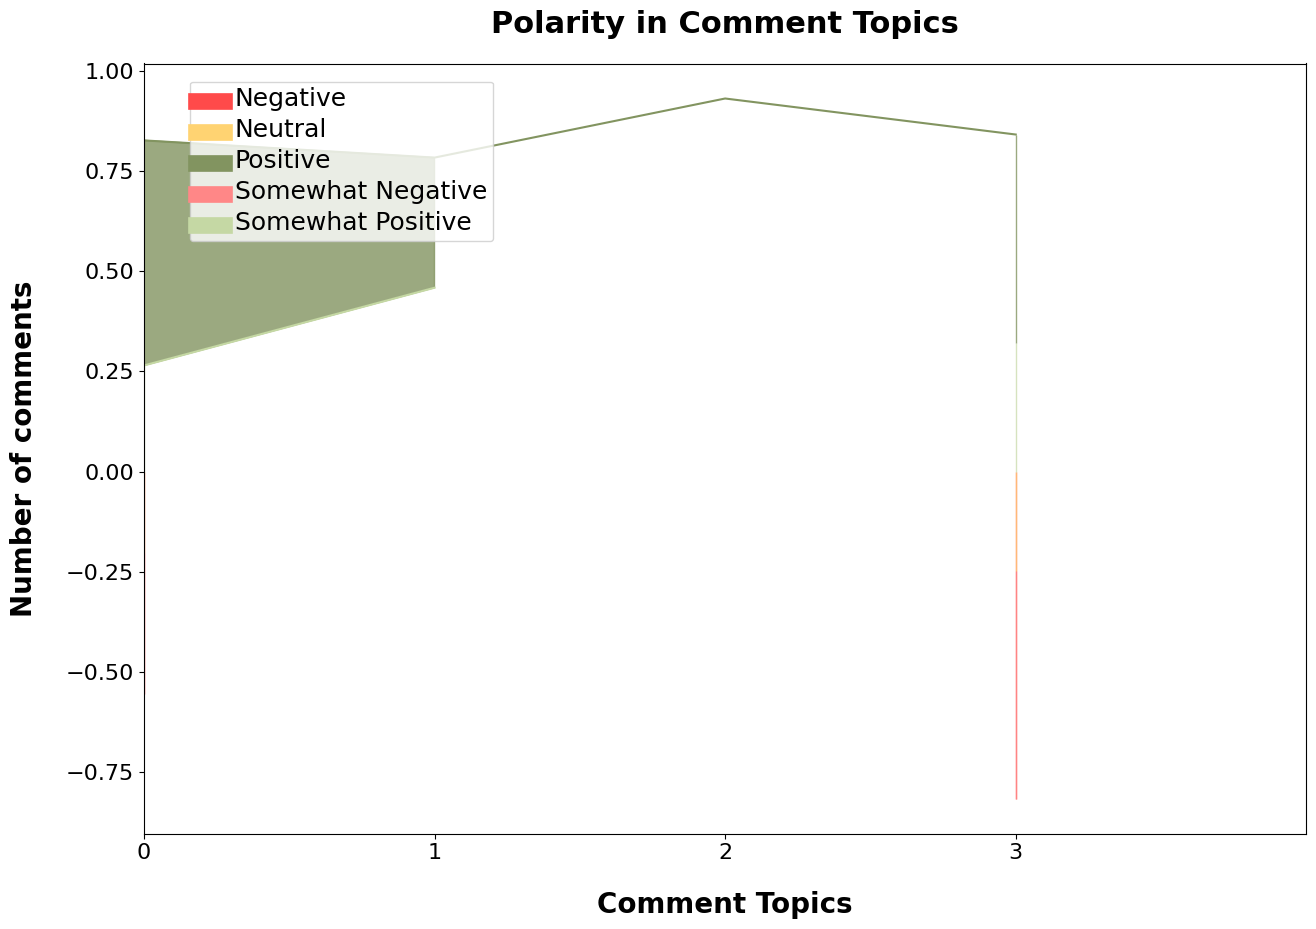

In [ ]:
ax = vis_dfS2.plot(xticks=vis_dfS2.index, ylabel="Number of comments", figsize=(15,10), fontsize=16, colormap=color_map2)

ax.set_xlabel("Comment Topics", fontsize=20, fontweight="semibold", labelpad=20)
ax.set_ylabel("Number of comments", fontsize=20, fontweight="semibold", labelpad=20)
ax.set_title("Polarity in Comment Topics", fontsize=22,pad=22, fontweight="bold" )

ax.fill_between(vis_dfS2.index, vis_dfS2["Negative"], color = '#FF4A4A', alpha= 0.7)
ax.fill_between(vis_dfS2.index, vis_dfS2["Negative"], vis_dfS2["Somewhat Negative"], color = '#FF8787', alpha= 0.7)
ax.fill_between(vis_dfS2.index,vis_dfS2["Somewhat Negative"], vis_dfS2["Neutral"],color = '#FFD372' , alpha= 0.7)
ax.fill_between(vis_dfS2.index, vis_dfS2["Neutral"], vis_dfS2["Somewhat Positive"], color = '#C5D8A4', alpha= 0.7)
ax.fill_between(vis_dfS2.index,vis_dfS2["Somewhat Positive"], vis_dfS2["Positive"],color = '#829460' , alpha= 0.8)

plt.xlim(0,4)

leg = plt.legend(loc=(0.04, 0.77))
for line in leg.get_lines():
    line.set_linewidth(12)
for text in leg.get_texts():
    text.set_fontsize(18)

plt.show()